C:\Users\Shota\AppData\Local\Temp\ipykernel_1948\2669630838.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


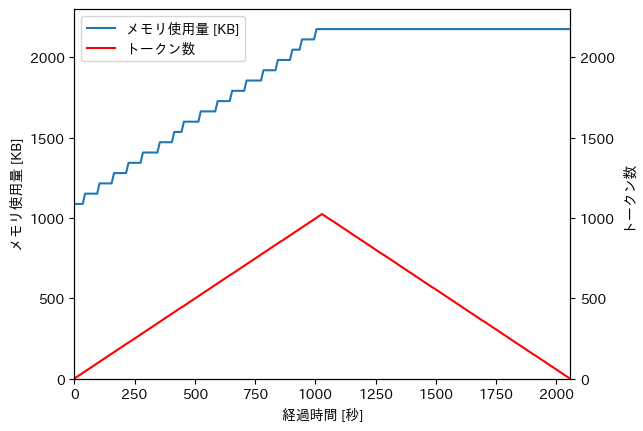

In [62]:
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

df_mem = pd.read_csv(
    "memory.csv",
    header=None,
    dtype={0: str, 1: int},
    parse_dates=[0],
    index_col=0,
    names=("時刻", "メモリ使用量 [KB]"),
)
df_eve = pd.read_csv(
    "event.csv",
    header=None,
    dtype={0: str, 1: str, 2: int},
    parse_dates=[0],
    index_col=0,
    names=("時刻", "PATH", "トークン数"),
)

begin = df_eve.index.min()
end = df_eve.index.max()
df_mem["メモリ使用量 [KB]"] = df_mem["メモリ使用量 [KB]"] / 1024
df_mem = df_mem[begin:end]
df_eve = df_eve[begin:end]
df_mem.index -= begin
df_eve.index -= begin

df_mem.index = df_mem.index.seconds
df_eve.index = df_eve.index.seconds

fig, ax = plt.subplots()

df_mem.plot(
    ax=ax,
    xlabel="経過時間 [秒]",
    ylabel="メモリ使用量 [KB]",
    xlim=(df_eve.index[0], df_eve.index[-1]),
    ylim=(0, 2300),
    legend=False,
)

ax2 = ax.twinx()
ax2.set_xlim(df_eve.index[0], df_eve.index[-1])
ax2.set_ylim(0, 2300)
df_eve.plot(
    ax=ax2,
    xlabel="経過時間 [秒]",
    ylabel="トークン数",
    xlim=(df_eve.index[0], df_eve.index[-1]),
    ylim=(0, 2300),
    color={"トークン数": "red"},
    legend=False,
)

hans1, labs1 = ax.get_legend_handles_labels()
hans2, labs2 = ax2.get_legend_handles_labels()
ax.legend(hans1+hans2, labs1+labs2)

fig.show()
fig.savefig("hoge.png", bbox_inches="tight", pad_inches=0)
fig.savefig("hoge.pdf", bbox_inches="tight", pad_inches=0)